# Homework 07: The Normal Distribution, The Central Limit Theorem, Confidence Intervals
***

**Name**: Matthew Mayer

***

This assignment is due on Canvas by **6:00PM on Friday October 28**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available in the Homework 01 assignment write-up on Canvas. To make life easier on the grader if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do $\color{red}{\text{Kernel}}$ $\color{red}\rightarrow$ $\color{red}{\text{Restart & Run All}}$ as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** $\color{red}{\text{write a summary of the results}}$ in Markdown directly below your code. 
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---

For this HW you will want to import a few of the usuals:

In [1]:
# Per the standard import pandas as 'pd' and numpy as 'np'
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline 
import scipy.stats as stats
from scipy.stats import norm

# Problem 1
***
We are going to look at some data from an insurance company that insures teenage drivers. `insurance.csv` is a sample of 1000 males and 1000 females all of whose ages are between 16 and 19 inclusive.

This insurance company has decided to use 'sex' as a proxy for deciding how large of a premium to charge for car insurance.

Read in the csv file `insurance.csv`.

### Part A
***(1 point)*** Load the `csv` file into a dataframe and call it `dfInsurance`:

In [2]:
# Read 'insurance' into dfInsurance
dfInsurance = pd.read_csv('insurance.csv')

### Part B
***(1 point)*** Take a look at the data.

In [3]:
# Take a look at the data here:
dfInsurance.head()

,Sex,miles driven,Age,Citations
0,F,4200.826390,18,0
1,F,5468.727014,17,0
2,F,5282.253745,18,0
3,F,5060.526521,17,0
4,F,5101.878224,16,2


In [4]:
dfInsurance.dtypes

Sex              object
miles driven    float64
Age               int64
Citations         int64
dtype: object

### Data Description:

This data contains records from a number of teenage drivers. The drivers were observed for 12 months and the number of miles they drove and the number of citations they received were recorded. Citations were for wreckless driving, disobeying traffic laws, speeding, and/or accidents.

$\color{red}{\text{Sex}}$ - This is the sex of the driver.

$\color{red}{\text{miles driven}}$ - This is the number of miles driven during the observation period.

$\color{red}{\text{Age}}$ - This is the age of the driver at the beginning of the observation period.

$\color{red}{\text{Citations}}$ - This is the number of citations received by the driver.


### Part C
***(2 points)*** Which sex has more overall citations?

In [5]:
# Code here to print your answer:
M = dfInsurance.loc[(dfInsurance['Sex']=='M')& (dfInsurance['Citations']>0),'Citations'].sum()
F = dfInsurance.loc[(dfInsurance['Sex']=='F')& (dfInsurance['Citations']>0),'Citations'].sum()
if(M==F):
    print("Both sexes have the same amount of citations.")
elif(M>F):
    print("Males have more citations than females.")
else:
    print("Females have more citations than males.")

Males have more citations than females.


### Part D
***(2 points)*** Find the mean number of citations received by males and the mean number of citations received by females. Who received more citations in the year?


In [6]:
#Code your answer here:
MMean = dfInsurance.loc[(dfInsurance['Sex']=='M'), 'Citations'].mean()
FMean = dfInsurance.loc[(dfInsurance['Sex']=='F'), 'Citations'].mean()
if(MMean==FMean):
    print("Both sexes have the same average amount of citations.")
elif(MMean>FMean):
    print("Males have more average citations than females.")
else:
    print("Females have more average citations than males.")

Males have more average citations than females.


### Part E
***(3 points)*** Estimate the difference in population means (for citations received) by creating a 95% CI for the difference between the sample means for number of citations received by males and females.

Recall the equation below from lecture. Perform the proper calculations 'by hand' (i.e. code without a canned function).

$\bar{X}-\bar{Y}\pm Z_{\frac{\alpha}{2}}\cdot\sqrt{\frac{\sigma_1^2}{m}+\frac{\sigma_2^2}{n}}$

In [7]:
# Code your answer here:
Xbar = MMean
Ybar = FMean
m = 1000
n = 1000
Zatwo = stats.norm.ppf((1-.05/2))
Xvar = sum((Xi - Xbar)**2/(m-1) for Xi in dfInsurance.loc[(dfInsurance['Sex']=='M'), 'Citations'])
Yvar = sum((Yi - Ybar)**2/(n-1) for Yi in dfInsurance.loc[(dfInsurance['Sex'] == 'F'), 'Citations'])
std = np.sqrt((Xvar/m)+(Yvar/n))
low = Xbar - Ybar - (Zatwo*std)
high = Xbar - Ybar + (Zatwo*std)
print('[', low, ',', high,']')

[ 0.00283447638728844 , 0.13916552361271156 ]


### Part F
***(1 point)*** Is 0 inside the confidence interval? Describe the meaning of your results.


Solution here:
0 is not inside of the confidence interval. This means that we are able to eliminate 0 as the difference between the difference in population which means we know that there is a greater amount of mean citations for men 95% of the time.

### Part G
***(4 points)*** Compare the number of miles driven per year by each sex. Start by getting a visual representation of the number of miles driven by each sex. Graph both male and female 'miles driven' distributions in the same frame for comparison.


Text(0.5, 1.0, '')

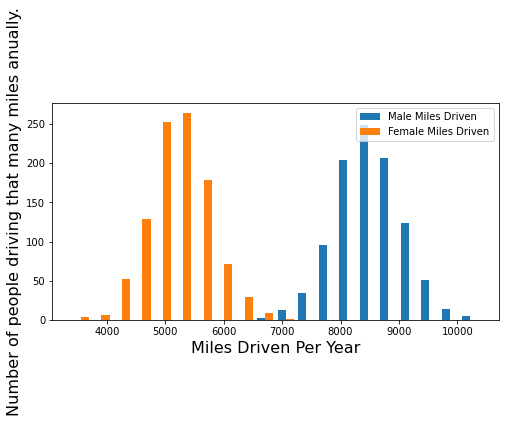

In [19]:
# Code your answer here:
fig, ax = plt.subplots(figsize=(8,4))

# Plot histogram 


# Add axis labels 
ax.set_xlabel("Miles Driven Per Year", fontsize=16)
ax.set_ylabel("Number of people driving that many miles anually.", fontsize=16)
dfMaleDrive = dfInsurance.loc[(dfInsurance['Sex']=='M'), 'miles driven']
dfFemaleDrive = dfInsurance.loc[(dfInsurance['Sex']=='F'), 'miles driven']
plt.hist([dfMaleDrive, dfFemaleDrive], 20, label= ["Male Miles Driven", "Female Miles Driven"])
plt.legend(loc='upper right')
ax.set_title("", fontsize=20)

### Part H
***(1 point)*** Based on the distributions, who appears to drive more miles in a year? Is there any overlap of histograms? Describe what you have found.

Solution: 
Males appear to drive more miles in a year at least according to this sample. There is some overlap in the histogram since the minimum amount of miles driven by males is less than the maximum amount of miles driven by females, although this overlap is not large.

### Part I
***(2 points)*** What is the difference in mean miles driven by the two groups (male and female)?

In [9]:
# Code solution here:
print(round(dfMaleDrive.mean()-dfFemaleDrive.mean(),3))

3291.517


### Part J
***(3 points)*** Estimate the difference in population means (for miles driven) by creating a 95% CI for the difference between the sample means for 'miles driven' by males and females.

Recall the equation below from lecture. Perform the proper calculations 'by hand' (i.e. code without a canned function).

$\bar{X}-\bar{Y}\pm Z_{\frac{\alpha}{2}}\cdot\sqrt{\frac{\sigma_1^2}{m}+\frac{\sigma_2^2}{n}}$

Create a 95% CI for the difference in miles driven per year.

In [10]:
# Code solution here:
Xbar = dfMaleDrive.mean()
Ybar = dfFemaleDrive.mean()
m = dfMaleDrive.count()
n = dfFemaleDrive.count() #<- Got Z a/2 from lecture slides. 
Xvar = sum((Xi - Xbar)**2/(m-1) for Xi in dfMaleDrive)
Yvar = sum((Yi - Ybar)**2/(n-1) for Yi in dfFemaleDrive)
std = np.sqrt((Xvar/m)+(Yvar/n))
low = Xbar - Ybar - (Zatwo*std)
high = Xbar - Ybar + (Zatwo*std)
print('[', low, ',', high,']')

[ 3243.6094092292306 , 3339.4244027947434 ]


### Part K
***(1 points)*** Is 0 in the interval? Describe your findings.

Solution:
0 is not in the interval because of this we know that there is a definite difference between the mean miles driven between males and females where males have a higher mean.

### Part L
***(4 points)*** Create a column called 'CPM'(this acronym stands for citations per 1000 miles), and put in it the number of citations divided by the number of miles driven (multiplied by 1000). The multiplication by 1000 ensures we are looking at citations per 1000 miles. This is done because the numbers are so small.

After you create the 'CPM' column look at the tail of the dataframe.

In [11]:
# Code your solution here:
dfInsurance['CPM']=(dfInsurance.loc[:, 'Citations']/dfInsurance.loc[:, 'miles driven'])*1000

dfInsurance.tail()

,Sex,miles driven,Age,Citations,CPM
1995,M,8433.768080,17,1,0.118571
1996,M,8047.929523,18,1,0.124256
1997,M,7285.647012,18,1,0.137256
1998,M,8579.702457,18,0,0.000000
1999,M,7868.067827,16,0,0.000000


### Part M
***(2 points)*** Look at the difference in means for male CPM and female CPM. Which sex receive more citations per 1000 miles?

In [20]:
# Code solution here:
dfMaleCPM = dfInsurance.loc[(dfInsurance['Sex']=='M'), 'CPM']
dfFemaleCPM = dfInsurance.loc[(dfInsurance['Sex']=='F'), 'CPM']
dif = dfMaleCPM.mean()-dfFemaleCPM.mean()
if (dif>0):
    print("Males recieve more citations per 1000 miles.")
elif (dif<0):
    print("Females recieve more citations per 1000 miles.")
else:
    print("Males and females receive the same amount of citations per 1000 miles.")

Females recieve more citations per 1000 miles.


### Part N
***(1 point)*** You should have discovered that females get more citations per mile than do males. How does this go together with the fact that males get more citations in a year?

Solution:
Males get more citations annually despite getting less citations per 1000 miles because males are driving so much more as determined in part G. Because males are driving so much more than females they get more citations overal despite getting them at a lesser rate.

### Part O
***(3 points)*** Estimate the difference in population means (for CPM's) by creating a 95% CI for the difference between the sample means for 'CPM' for males and females.

Recall the equation below from lecture. Perform the proper calculations 'by hand' (i.e. code without a canned function).

$\bar{X}-\bar{Y}\pm Z_{\frac{\alpha}{2}}\cdot\sqrt{\frac{\sigma_1^2}{m}+\frac{\sigma_2^2}{n}}$

Create a 95% CI for the difference in miles driven per year.


In [13]:
# Code solution here:
Xbar = dfMaleCPM.mean()
Ybar = dfFemaleCPM.mean()
m = dfMaleCPM.count()
n = dfFemaleCPM.count() 
Xvar = sum((Xi - Xbar)**2/(m-1) for Xi in dfMaleCPM)
Yvar = sum((Yi - Ybar)**2/(n-1) for Yi in dfFemaleCPM)
std = np.sqrt((Xvar/m)+(Yvar/n))
low = Xbar - Ybar - (Zatwo*std)
high = Xbar - Ybar + (Zatwo*std)
print('[', low, ',', high,']')

[ -0.03248914054212028 , -0.010832224801218458 ]


### Part P
***(1 point)*** Does your result contain 0? Describe your findings.

Solution:
My result does not contain 0. Because of this we can determine which population mean is actaully higher with a 95% confidence interval and that would be the female population which 95% of the time has a higher sample mean.

### Part Q
***(1 point)*** Can you explain why males pay higher insurance premiums when they receive fewer citations per mile? Hint: is insurance typically sold by the mile or by the year?

Solution:
Males pay higher insurance premiums despite getting fewer citations per mile because insurance is sold by year or half year. This combined with the higher amount of miles/time that males are driving compared to females overall means that a company can justify charging them more based on the fact that they are more likely to get citations overall during the pay period.

### Part R
***(2 points)*** Consider the graphic below. It is merely a cut-and-past .png, it isn't live code.

Look at the code and the graphic and describe what story it tells.

![title](code.png)
![title](graph.png)

In [14]:
# The graphic above was created with this code.
# Of course this code will likely not work in your notebook since
# you have different variable names. This is why it is commented out.

#mCPM = dfInsurance.loc[dfInsurance['Sex']=='M', 'CPM'].values
#fCPM = dfInsurance.loc[dfInsurance['Sex']=='F', 'CPM'].values

#bins = np.linspace(0.001, 0.6, 8)
#plt.hist([mCPM, fCPM], bins, label=['male', 'female'])
#plt.legend(loc='upper right')
#plt.show()

Solution:
The main point of this graph is that females are given way more citations than males. Females continue to get higher and higher CPMs by the time that males are no longer getting fined. Females also have a higher mode and mean CPM than males despite driving less miles than they do.

### Part S
***(5 points)*** What percent of males drive between 6400 and 8400 miles per year?
What percent of females drive that same amount?


In [15]:
# Code your solution here:
Xvar = sum((Xi - Xbar)**2/(m-1) for Xi in dfMaleDrive)
Yvar = sum((Yi - Ybar)**2/(n-1) for Yi in dfFemaleDrive)
stdX = np.sqrt(Xvar)
stdY = np.sqrt(Yvar)
Z6400X= (6400 - Xbar)/stdX
Z8400X = (8400- Xbar)/stdX
solX = stats.norm.cdf(Z8400X)-stats.norm.cdf(Z6400X)
Z6400Y = (6400- Ybar)/stdY
Z8400Y = (8400- Ybar)/stdY
solY = stats.norm.cdf(Z8400Y)-stats.norm.cdf(Z6400Y)
print(round(solX* 100,2), "percent of males drive between 6400 and 8400 miles per year.")
print(round(solY*100,2), "percent of females drive between 6400 and 8400 miles per year.") 

6.42 percent of males drive between 6400 and 8400 miles per year.
5.66 percent of females drive between 6400 and 8400 miles per year.


### Part T
***(4 points)*** 95% of females drive less than x miles. What is x?

In [16]:
# Code your solution here:
x = (stdY * stats.norm.ppf((1-.05))) + Ybar
print(x)

8627.20500945822


# Problem 2
***

Let $X$ be a normal random variable, $X \sim N(\mu, \sigma^2) = N(5,9)$.

Let $Z$ be a $\color{red}{\text{standard}}$ normal random variable, $Z \sim N(\mu, \sigma^2) = N(0,1)$.


### Part A

***(2 points)*** Compute $P(X \leq 8.75)$.

In [17]:
# Code your solution here:
sigX = 3
muX = 5
X=8.75
PX = stats.norm.cdf((8.75-5)/3)
print(PX, "or", round(PX*100,2), "percent.")

0.8943502263331446 or 89.44 percent.


### Part B

***(2 points)*** Compute $P(Z\leq 1.25)$.

In [18]:
# Code your solution here:
print(stats.norm.cdf(1.25), "or", round(100*stats.norm.cdf(1.25),2), "percent.")

0.8943502263331446 or 89.44 percent.


### Part C

***(2 points)*** Explain why the answer to these first two questions are the same.

Solution:
The answers to part A and B are the same because the normalized version of 8.75 given $\mu$ is 5 and $\sigma$ is 3 is 1.25 and the problem is then asking the probability of being less than or equal to the same normalized value for each part.